In [19]:
import torch
import torch.nn as nn
import torchvision
import skimage.data as dt
from skimage import transform 
import numpy as np

In [20]:
import os

In [93]:
def imgarray(root_dir):
    count = 0
    imagefiles = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
    images = np.zeros((1210,262,262,3))
    labels = np.zeros((1210),dtype='S140')
    for image in imagefiles:
        im = dt.imread(image)
        if(im.shape == (262,262,3)):
            images[count] = transform.resize(dt.imread(image), (262,262))
            name = image.split('/')[-1].split('.')[-2]
            if (name[:4] == "neck"):
                labels[count] = "necklace"
            elif (name[:4] == "ring"):
                labels[count] = "ring"
            elif (name[:4] == "earr"):
                labels[count] = "earring"
            elif (name[:4] == "brac"):
                labels[count] = "bracelet"
            else:
                pass
            count += 1
    print(count)
    return images,labels



In [94]:
root_dir =  "../DataSets/Jewellery/combined//"
images,label = imgarray(root_dir)

E:\Anaconda\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
E:\Anaconda\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


1210


In [30]:
import matplotlib.pyplot as plt

E:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


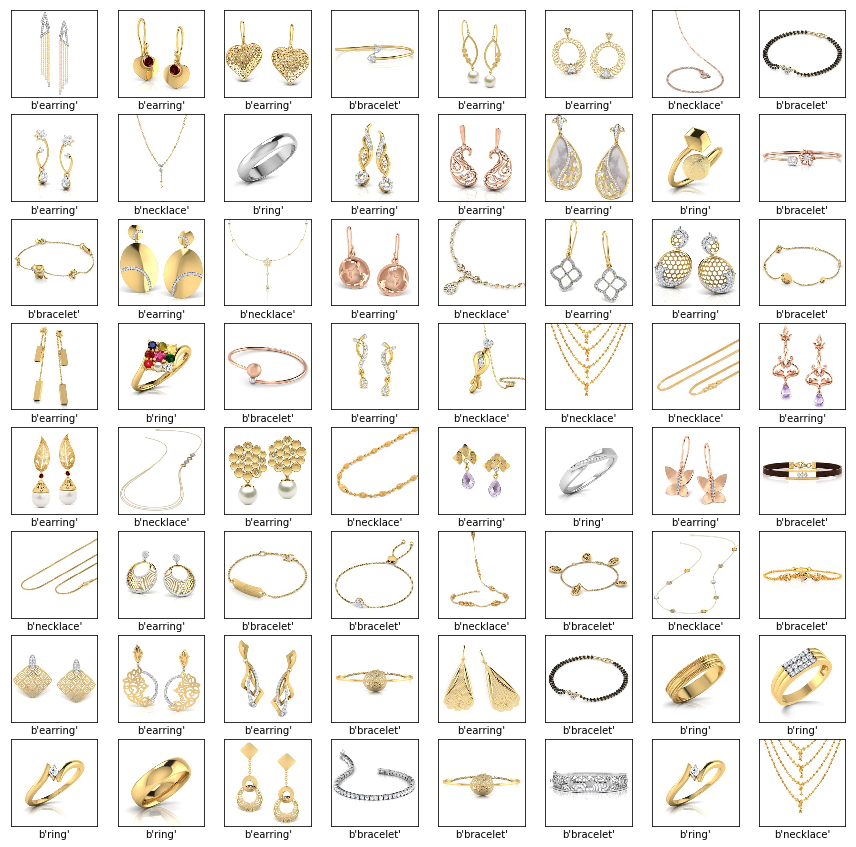

In [95]:
#Let's Visualize some images 
plt.figure(figsize=(15,15))
rand = np.random.randint(1,len(images),64)
for i in range(len(rand)):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(images[rand[i]])
    plt.xlabel(label[rand[i]])